## 1. Import the necessary libraries

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import import_ipynb
from EDASentimentAnalysis import remove_punctuation,remove_stopword
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from pyvi import ViTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2 Data preprocessing

>Read CSV

In [33]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [34]:
X_train,y_train = ReadData("../data/data_processed/trainprocessed.csv")
X_test,y_test=ReadData("../data/data_processed/testprocesssed.csv")

In [35]:
print(X_test[128])

sản_phẩm sài tạm thích camera pin trâu còn đt sài ko biết bạn nào giống mình ko sài ứng_dụng dể một tối bấm hoài mới cài nhạc chuông điện_thoại hay mất


In [36]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(8898,)
y_train size (8898,)


> word separation

In [37]:
def wordseparation(comment):
    return [review.split() for review in comment]

> Execute function

In [38]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', '832019', 'tình_trạng', 'pin', 'còn', '88', 'ai', 'giống', 'tôi'], ['sao', 'gọi', 'điện_thoại', 'màn_hình', 'chấm', 'nhỏ', 'nháy', 'gần', 'camera', 'vậylúc']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', '45', 'tuy', 'chip', '439', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivo91c', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


>Create  Corpus

In [39]:
def CreateCorpus(Vi):
    tokenizer=Tokenizer(oov_token='<oov>')
    tokenizer.fit_on_texts(Vi)
    return tokenizer

> Execute function

In [40]:
X_train_corpus=CreateCorpus(X_train)
X_test_corpus=CreateCorpus(X_test)
print(X_train_corpus.word_index)
print(X_test_corpus.word_index)

{'<oov>': 1, 'máy': 2, 'mua': 3, 'pin': 4, 'mình': 5, 'dùng': 6, 'mới': 7, 'game': 8, 'tốt': 9, 'chơi': 10, 'ko': 11, 'quá': 12, 'ok': 13, '1': 14, 'đẹp': 15, 'giá': 16, 'mượt': 17, 'nhanh': 18, 'sạc': 19, 'ngày': 20, 'ổn': 21, 'thấy': 22, 'chụp': 23, 'camera': 24, 'còn': 25, 'xài': 26, 'tầm': 27, 'hơn': 28, 'về': 29, 'k': 30, 'màn_hình': 31, 'trâu': 32, 'trong': 33, 'đc': 34, 'hơi': 35, '2': 36, 'sản_phẩm': 37, 'lỗi': 38, 'khá': 39, 'tháng': 40, 'tay': 41, 'sao': 42, 'nhân_viên': 43, 'hay': 44, 'con': 45, 'mọi': 46, 'sử_dụng': 47, 'hình': 48, 'sài': 49, 'hết': 50, 'ngon': 51, 'nói_chung': 52, 'nóng': 53, 'vân': 54, 'nhiệt_tình': 55, 'thứ': 56, 'lắm': 57, '3': 58, 'nghe': 59, 'nó': 60, 'luôn': 61, 'loa': 62, 'điện_thoại': 63, 'lag': 64, 'khác': 65, 'ảnh': 66, 'wifi': 67, 'tệ': 68, 'người': 69, 'xem': 70, 'biết': 71, 'mấy': 72, 'ở': 73, 'nào': 74, 'cấu_hình': 75, 'lần': 76, 'dc': 77, 'bạn': 78, 'đổi': 79, 'nói': 80, 'hàng': 81, 'cả': 82, 'tôi': 83, 'sáng': 84, 'đến': 85, 'tuần': 86, 'đt

In [41]:
print(f"Total Word in Corpus of train: ({len(X_train_corpus.word_index)})")
print(f"Total Word in Corpus of test: ({len(X_test_corpus.word_index)})")

Total Word in Corpus of train: (12614)
Total Word in Corpus of test: (5352)


> longest sentence in the training set, longest sentence in the test set

In [42]:
max_sentence_Xtrain= max([len(i) for i in  (X_train)])
print(f"max_sentence_Xtrain:{max_sentence_Xtrain} word")
max_sentence_Xtest=max([len(i) for i in (X_test)])
print(f"max_sentence_Xtest:{max_sentence_Xtest} word")

max_sentence_Xtrain:129 word
max_sentence_Xtest:131 word


> Generate input training data by converting words to indexes and performing padding to bring into the model

In [43]:
def Padding(Vi):
    vi_sequence=X_train_corpus.texts_to_sequences(Vi)
    vi_sequence=pad_sequences(vi_sequence,maxlen=max_sentence_Xtest,padding='pre')
    return vi_sequence

> Execute Function

In [44]:
X_train=Padding(X_train)
X_test=Padding(X_test)
print(X_train[0])
print(X_test[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    4   95   25 1392  129    3 4989  377    4
   25 3568  118  351   83]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0

>Convert labels to numbers

In [45]:
label_encoder=LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
print(y_train_encoded[0:3])

[1 0 1]


>Convert number to one_hot_vector

In [46]:
y_train_one_hot=to_categorical(y_train_encoded)
print(y_train_one_hot[0:3])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 3.Built Model LSTM

### 3.1. Design configuration for LSTM network

In [47]:
dropout=0.3
total_word=len(X_train_corpus.word_index)
num_classes=3
embedding_size = 128
num_lstm_units = 18
epochs=35

### 3.2. Model LSTM

In [48]:
model = Sequential()
model.add(Embedding(total_word, embedding_size, name='embedding_layer'))
model.add(LSTM(num_lstm_units, return_sequences=True,name='LSTM_layer_1'))
model.add(Dropout(dropout,name='Dropout_layer_1'))
model.add(LSTM(num_lstm_units,name='LSTM_layer_2'))
model.add(Dense(num_classes, activation='softmax'))

### 3.3. Hyperparameter

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### 3.4. Train

 >Monitor the trainning process to stop earlier

In [50]:
# Khởi tạo callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='loss', 
    patience=4,          
    restore_best_weights=True  
)

In [51]:
model.fit(X_train, 
          y_train_one_hot, 
          verbose=1, epochs=epochs,
          batch_size=32,
          callbacks=[early_stopping_callback] )

Epoch 1/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.6263 - loss: 0.8287
Epoch 2/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.8387 - loss: 0.4352
Epoch 3/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.8874 - loss: 0.3006
Epoch 4/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9212 - loss: 0.2256
Epoch 5/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9413 - loss: 0.1738
Epoch 6/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9560 - loss: 0.1461
Epoch 7/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9612 - loss: 0.1240
Epoch 8/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.9729 - loss: 0.0944
Epoch 9/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.9812 - loss: 0.0739
Epoch 10/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9791 - loss: 0.0684
Epoch 11/35
279/279 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.9835 - loss: 0.0608
Epoch 12/35
279/279 ━━━━━━━━━━

>Network Architecture

In [52]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ (None, 131, 128)       │     1,614,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer_1 (LSTM)             │ (None, 131, 18)        │        10,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_layer_1 (Dropout)       │ (None, 131, 18)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer_2 (LSTM)             │ (None, 18)             │         2,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            57 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,883,693 (18.63 MB)

 Trainable params: 1,627,897 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,255,796 (12.42 MB)

None


> Network Architecture Diagram

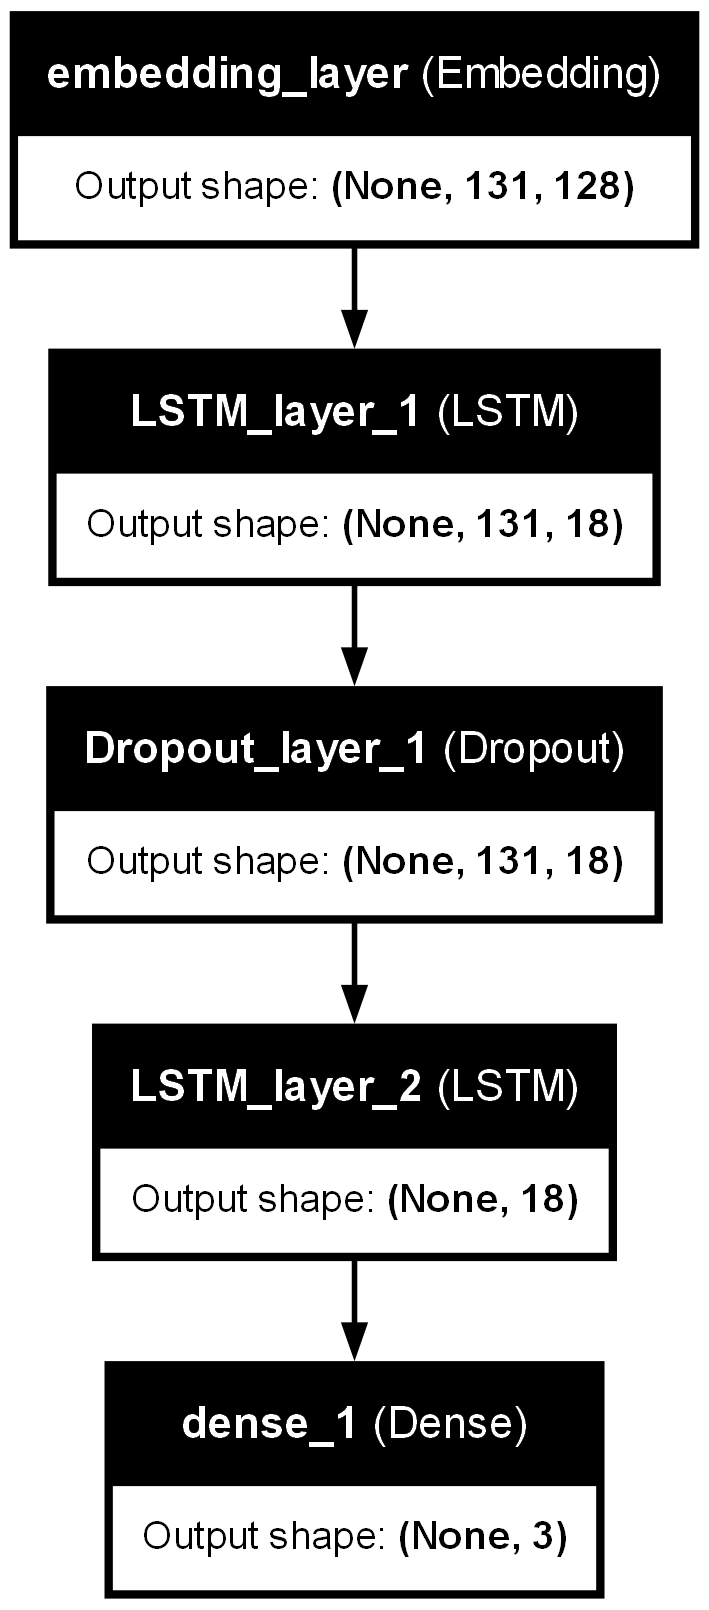

In [53]:
# Tạo đồ thị cho mô hình
plot_model(model, to_file='../design/model_LSTM_sentiment.png', show_shapes=True, show_layer_names=True)

> Dump file models_sentiment.h5

In [54]:
model.save('../model/model_sentiment_lstm.h5')

### 3.5 Evaluation test dataset

> Load file model_sentiment_lstm.h5

In [55]:
model_sentiment=load_model("../model/model_sentiment_lstm.h5")

> Get the weight of the embedding layer

In [56]:
weights = model_sentiment.layers[0].get_weights()[0]

# Giảm chiều dữ liệu sử dụng t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(weights)
print(embeddings_2d[0:2])

[[-34.62622   29.018255]
 [ -6.172692  13.484315]]


> Visualize the context and semantic correlation of words

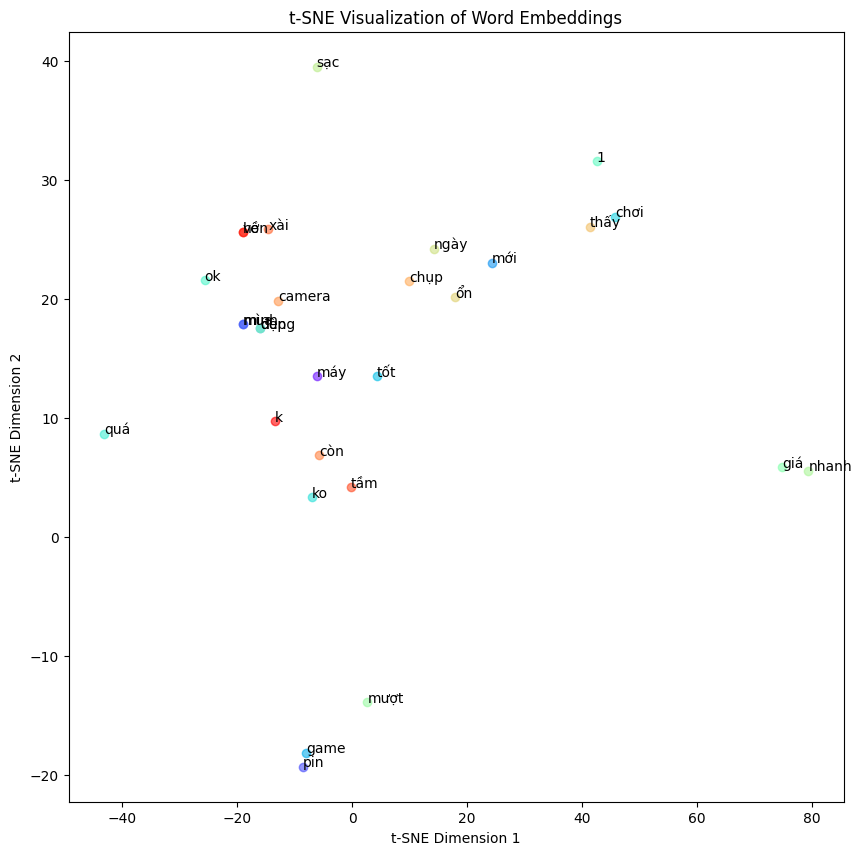

In [57]:
# Vẽ trực quan hóa với nhãn từ
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, 30))
plt.figure(figsize=(10, 10))
for i in range(1,30):  
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], marker='o', color=colors[i], alpha=0.6)
    plt.annotate(X_train_corpus.index_word[i+1], (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings')
plt.show()


> predict  test dataset 

In [58]:
result = model_sentiment.predict(X_test)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


In [59]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[125:150])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[125:150])

[2 0 2 0 0 2 2 2 0 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2]
['Positive' 'Negative' 'Positive' 'Negative' 'Negative' 'Positive'
 'Positive' 'Positive' 'Negative' 'Negative' 'Positive' 'Negative'
 'Negative' 'Positive' 'Negative' 'Positive' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive']


> Data Preprocessing sample

In [60]:
def Proprocessing(comment):
    comment= remove_punctuation(comment.lower())
    comment= remove_stopword(comment)
    comment= [ViTokenizer.tokenize(comment)]
    comment=Padding(comment)
    print(comment)
    return comment

> Predict one a new sample

In [61]:
comment="Sản phẩm Sài cũng tạm thích cái camera và pin trâu. Còn đt đang sài ko biết có bạn nào giống mình ko lúc Sài ứng dụng nhưng dể một lúc thì tối  bấm hoài không lên. Để lúc mới lên  cài nhạc chuông cho điện thoại hay bị mất"
comment_processed=Proprocessing(comment)
result_one=model_sentiment.predict(comment_processed)
predict_a_label=np.argmax(result_one,axis=1)
print(predict_a_label)
print(label_encoder.inverse_transform(predict_a_label))

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  776
   561   49  111  108   24    4   32   25   87   49   11   71   78   74
   351    5   11   49  569 2137 1418  123  184  276  544    7  357  178
   612  468  506   44  132]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[0]
['Negative']


> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [62]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.8008
Precision: 0.7923
Recall: 0.8008
F1-score: 0.7960851865032615
